# Calour microbiome databases interface tutorial

## Setup

In [1]:
import calour as ca

/Users/amnon/miniconda3/envs/calour/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
ca.set_log_level(11)

In [3]:
%matplotlib notebook

## Load the data
We will use the Chronic faitigue syndrome data from:

Giloteaux, L., Goodrich, J.K., Walters, W.A., Levine, S.M., Ley, R.E. and Hanson, M.R., 2016.

Reduced diversity and altered composition of the gut microbiome in individuals with myalgic encephalomyelitis/chronic fatigue syndrome.

Microbiome, 4(1), p.30.

In [4]:
cfs=ca.read_amplicon('data/chronic-fatigue-syndrome.biom',
                     'data/chronic-fatigue-syndrome.sample.txt',
                     normalize=10000,min_reads=1000)

2018-07-26 13:09:44 INFO loaded 87 samples, 2129 features
2018-07-26 13:09:44 WARNING These have metadata but do not have data - dropped: {'ERR1331814'}
2018-07-26 13:09:44 INFO After filtering, 87 remaining


## preprocess
remove non-interesting bacteria, cluster bacteria and sort samples by disease status

In [5]:
cfs=cfs.filter_abundance(10)

2018-07-26 13:09:45 INFO After filtering, 1100 remaining


In [6]:
cfs=cfs.cluster_features()

2018-07-26 13:09:45 INFO After filtering, 1100 remaining


In [7]:
cfs=cfs.sort_samples('Subject')

## Viewing database annotations
in the interactive heatmap, when clicking on a bacteria, we get a list of all database results about the selected bacteria.

We can choose which databases to use by the `databases=['dbbact',...]` parameter. The possible databases depend on which database modules were installed.

Currently, supported microbiome database interfaces include:

* dbBact - a community database for manual annotations about bacteria (interface installation instruction at [dbbact-calour](https://github.com/amnona/dbbact-calour)).

* SpongeEMP - an automatic database for sea sponge samples (interface installation instruction at [spongeworld-calour](https://github.com/amnona/spongeworld-calour)).

* phenoDB - phenotypic information about selected bacteria (interface installation instruction at [pheno-calour](https://github.com/amnona/pheno-calour)).

By default, calour uses the dbBact database for microbiome data

<IPython.core.display.Javascript object>


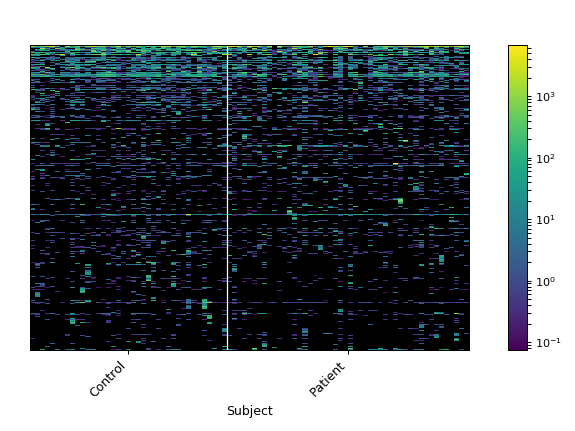

In [8]:
cfs.plot(sample_field='Subject',gui='jupyter')

## dbBact enrichment of selected bacteria
By selecting a set of bacteria (using the shift+click or ctrl+click) and choosing the "Enrichment" button, we can get a list of terms that are significantly enriched in the selected bacteria compared to the rest of the bacteria in the plot

## Adding dbBact annotations
(Only possible using the `gui='qt5'` GUI)

To add a new annotation to the selected set of bacteria, choose the "Annotate" button.

Detailed instructions are available at the dbBact.org website.

## Differential abundance
To find the bacteria significantly different between samples with 'Control' (healthy) and 'Patient' (sick) in the 'Subject' field.

In [9]:
dd=cfs.diff_abundance(field='Subject',val1='Control',val2='Patient', random_seed=2018)

2018-07-26 13:09:57 INFO 87 samples with both values
2018-07-26 13:09:57 INFO After filtering, 1100 remaining
2018-07-26 13:09:57 INFO 39 samples with value 1 (['Control'])
2018-07-26 13:09:58 INFO method meandiff. number of higher in ['Control'] : 38. number of higher in ['Patient'] : 16. total 54


### Plot the significant bacteria
When clicking on a bacteria, we'll get both dbBact, SpongeEMP, and phenoDB information

<IPython.core.display.Javascript object>


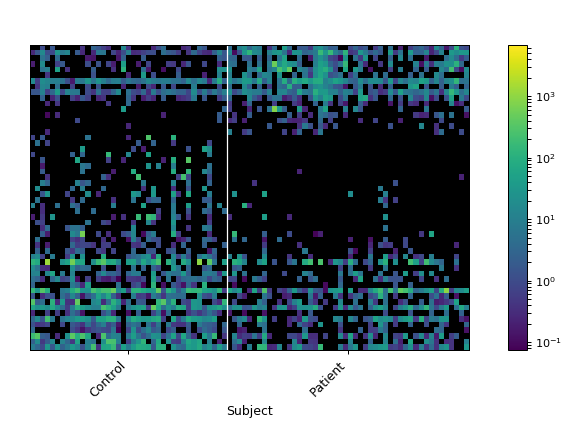

In [10]:
dd.plot(sample_field='Subject', gui='jupyter', databases=['dbbact','sponge'])

## dbBact term enrichment (`diff_abundance_enrichment`)
We can ask what is special in the bacteria significanly higher in the Control vs. the Patient group and vice versa.

* Note since we need to get the per-feature annotations from dbBact, we need a live internet connection to run this command.

### Default parameters

2018-07-26 13:10:03 INFO Getting dbBact annotations for 54 sequences, please wait...
2018-07-26 13:10:08 INFO Got 2328 annotations
2018-07-26 13:10:08 INFO Added annotation data to experiment. Total 705 annotations, 54 terms
2018-07-26 13:10:08 INFO removed 0 terms


<IPython.core.display.Javascript object>


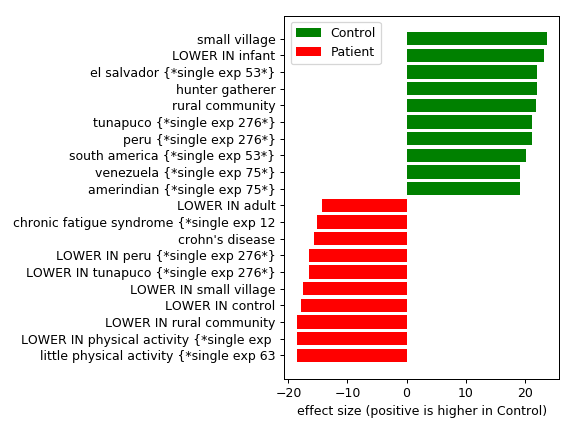

In [11]:
ax, enriched=dd.plot_diff_abundance_enrichment()

The enriched terms are in a calour experiment class (terms are features, bacteria are samples), so we can see the
list of enriched terms with the p-value (pval) and effect size (odif)

In [12]:
enriched.feature_metadata

odif     pvals  \
little physical activity {*single exp 63*}   -18.562500  0.000999   
LOWER IN physical activity {*single exp 63*} -18.562500  0.000999   
LOWER IN rural community                     -18.518092  0.000999   
LOWER IN control                             -17.807566  0.000999   
LOWER IN small village                       -17.452303  0.000999   
LOWER IN tunapuco {*single exp 276*}         -16.430921  0.000999   
LOWER IN peru {*single exp 276*}             -16.430921  0.000999   
crohn's disease                              -15.587171  0.000999   
chronic fatigue syndrome {*single exp 12*}   -15.187500  0.000999   
LOWER IN adult                               -14.254934  0.001998   
mus musculus                                 -13.588816  0.000999   
age > 1 year                                 -12.478618  0.004995   
kingdom of denmark {*single exp 273*}        -12.434211  0.006993   
mouse                                        -11.945724  0.000999   
state of oklahoma                            -11.501645  0.007992   
age 1 year                                   -11.368421  0.000999   
LOWER IN plant diet {*single exp 74*}        -11.368421  0.002997   
stroke {*single exp 333*}                    -11.235197  0.001998   
age one year {*single exp 273*}              -11.190789  0.003996   
research facility                            -10.968750  0.005994   
infant                                       -10.657895  0.018981   
LOWER IN male                                -10.347039  0.002997   
LOWER IN age 30-40 {*single exp 330*}        -10.125000  0.000999   
msw {*single exp 344*}                       -10.036184  0.007992   
finland                                      -10.036184  0.024975   
heterosexual {*single exp 344*}              -10.036184  0.007992   
LOWER IN age <1 year {*single exp 240*}       -9.858553  0.019980   
age                                           -9.858553  0.031968   
animal product diet                           -9.769737  0.005994   
obsolete_juvenile stage                       -9.547697  0.038961   
...                                                 ...       ...   
LOWER IN state of oklahoma                    14.210526  0.000999   
msm {*single exp 344*}                        14.388158  0.000999   
gay {*single exp 344*}                        14.388158  0.000999   
homosexual {*single exp 344*}                 14.388158  0.000999   
cron diet {*single exp 293*}                  15.009868  0.000999   
caloric restriction diet {*single exp 293*}   15.009868  0.000999   
LOWER IN united states of america             15.631579  0.000999   
sus scrofa                                    15.942434  0.000999   
pig                                           15.942434  0.000999   
right colon {*single exp 256*}                16.164474  0.000999   
left colon {*single exp 256*}                 16.164474  0.000999   
LOWER IN city                                 16.342105  0.000999   
influent {*single exp 53*}                    17.230263  0.000999   
sewage {*single exp 53*}                      17.230263  0.000999   
LOWER IN effluent                             17.230263  0.000999   
wastewater treatment plant                    17.452303  0.000999   
LOWER IN finland                              17.629934  0.000999   
tanzania {*single exp 190*}                   17.763158  0.000999   
hadza {*single exp 190*}                      17.763158  0.000999   
egypt {*single exp 62*}                       18.118421  0.000999   
amerindian {*single exp 75*}                  19.184211  0.000999   
venezuela {*single exp 75*}                   19.184211  0.000999   
south america {*single exp 53*}               20.250000  0.000999   
peru {*single exp 276*}                       21.315789  0.000999   
tunapuco {*single exp 276*}                   21.315789  0.000999   
rural community                               21.937500  0.000999   
hunter gatherer                               22.

We can plot the enriched terms heatmap to see the term scores for each bacteria.

Note now rows are the bacteria and columns are the terms

<IPython.core.display.Javascript object>


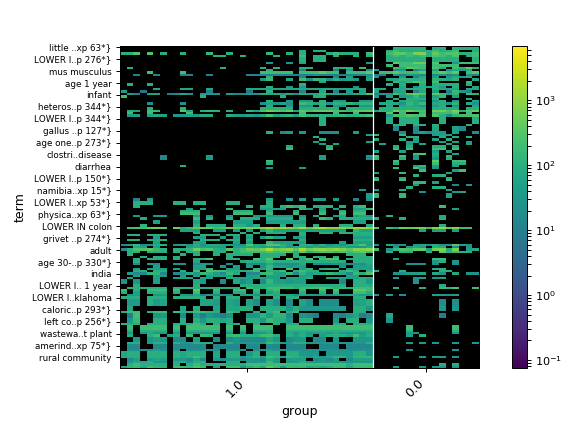

In [16]:
enriched.plot(gui='jupyter', databases=[], feature_field='term',sample_field='group',
              yticklabel_kwargs={'rotation': 0, 'size': 7})

## Look at the behavior of a single term
We want to see all the annotations where a given term appears, and see what bacteria from either group (CFS or healthy) appear in that annotations.
To do this, we use dbbact.show_term_details_diff(). The output of this function is an experiment where each COLUMN is a bacteria, and each row is an annotation. We see whether each bacteria appears in the annotation. Color indicates the annotation type.

In [38]:
dbbact=ca.database._get_database_class('dbbact')

2018-07-26 13:24:01 INFO found 12 annotations with term
2018-07-26 13:24:01 WARNING Do you forget to normalize your data? It is required before running this function
2018-07-26 13:24:01 INFO After filtering, 12 remaining


<IPython.core.display.Javascript object>


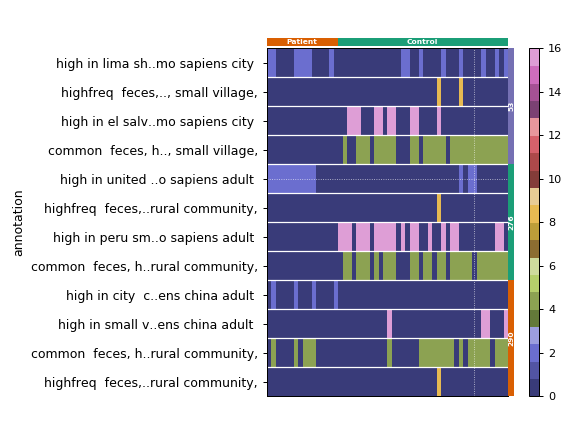

In [40]:
term_info_exp = dbbact.show_term_details_diff('small village',dd,gui='jupyter')

### getting enriched annotations instead of terms
Each annotation is coming from a single experiment (as opposed to terms that can come from annotations in multiple experiment)

2018-07-26 13:12:53 INFO removed 0 terms


<IPython.core.display.Javascript object>


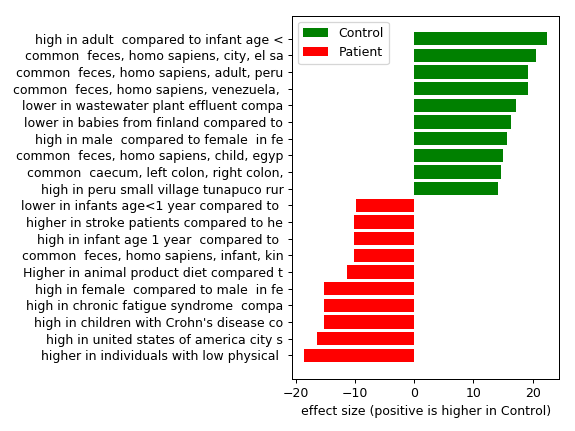

In [17]:
ax, enriched=dd.plot_diff_abundance_enrichment(term_type='annotation')

In [18]:
enriched.feature_metadata

odif     pvals  \
higher in individuals with low physical activit... -18.562500  0.000999   
 high in united states of america city state of... -16.430921  0.000999   
high in children with Crohn's disease compared ... -15.187500  0.000999   
 high in chronic fatigue syndrome  compared to ... -15.187500  0.000999   
 high in female  compared to male  in feces hom... -15.187500  0.000999   
Higher in animal product diet compared to plant... -11.368421  0.000999   
common  feces, homo sapiens, infant, kingdom of... -10.125000  0.000999   
 high in infant age 1 year  compared to adult a... -10.125000  0.000999   
higher in stroke patients compared to healthy c... -10.125000  0.001998   
lower in infants age<1 year compared to 1-3 yea...  -9.858553  0.016983   
lower in gay (msm) individuals compared to hete...  -9.414474  0.002997   
 high in age 1 year  compared to age 2 months  ...  -9.414474  0.001998   
higher in lean participants in human feces ( hi...  -8.437500  0.001998   
common  feces, homo sapiens, infant, kingdom of...  -8.437500  0.000999   
 high in age age one month  compared to age one...  -7.726974  0.006993   
high in healthy dogs compared to EPI dogs witho...  -7.726974  0.006993   
common  feces, homo sapiens, china, city, adult,    -7.371711  0.061938   
 high in age age > 1 year  compared to age < 1 ...  -7.016447  0.019980   
negatively correlated with age (30-80 years) ( ...  -7.016447  0.017982   
common  feces, homo sapiens, diarrhea, state of...  -6.750000  0.005994   
 high in city  compared to small village rural ...  -6.750000  0.006993   
high in old (14-28 days) compared to young (0-3...  -6.750000  0.010989   
common  feces, united states of america, canis ...  -6.750000  0.002997   
common in infants age <3 years (common  feces, ...  -6.750000  0.006993   
positively correlated with bmi ( high in body m...  -6.305921  0.053946   
common  feces, united states of america, canis ...  -6.305921  0.035964   
common  feces, homo sapiens, china, crohn's dis...  -6.305921  0.044955   
higher in feces of individuals with kidney ston...  -5.328947  0.057942   
higher in babies from finland compared to eston...  -5.062500  0.014985   
common  united states of america, colon, canis ...  -5.062500  0.020979   
...                                                       ...       ...   
common  feces, ethiopia, monkey, chlorocebus dj...   9.236842  0.018981   
common in feces of homosexual males (common  fe...   9.414474  0.025974   
common  feces, homo sapiens, brazil,                 9.592105  0.042957   
common  duodenum, jejunum, ileum, sus scrofa, u...   9.680921  0.014985   
high in healthy adult controls compared to chil...   9.947368  0.005994   
higher in caloric restriction (CRON) diet compa...   9.947368  0.004995   
common  feces, homo sapiens, adult, india,           9.947368  0.007992   
low in diarrhea compared to recovery period ( h...  10.036184  0.016983   
common  feces, homo sapiens, united states of a...  10.125000  0.013986   
common  feces, chlorocebus aethiops, ethiopia, ...  10.657895  0.009990   
common  feces, chlorocebus aethiops, ethiopia, ...  10.657895  0.004995   
higher in gay (msm) individuals compared to het...  10.657895  0.007992   
 high in wet season  compared to dry season  in...  10.657895  0.003996   
common  feces, homo sapiens, united states of a...  11.190789  0.003996   
 high in control  compared to chronic fatigue s...  11.368421  0.003996   
higher in babies from russia compared to finlan...  11.812500  0.004995   
common  feces, homo sapiens, city, lima, shanty...  11.812500  0.004995   
common  feces, homo sapiens, tanzania, hunter g...  12.789474  0.000999   
lower in small intestine compared to colon in p...  12.789474  0.000999   
 high in adult age 30-40  compared to infant ag...  13.233553  0.002997   
 high in peru small village tunapuco rural comm...  14.210526  0.001998   
common  caecum, left colon, right colon, sus sc...  14.654605  0.000999   
common 

### Getting both enriched terms and annotations

2018-07-26 13:13:05 INFO removed 0 terms


<IPython.core.display.Javascript object>


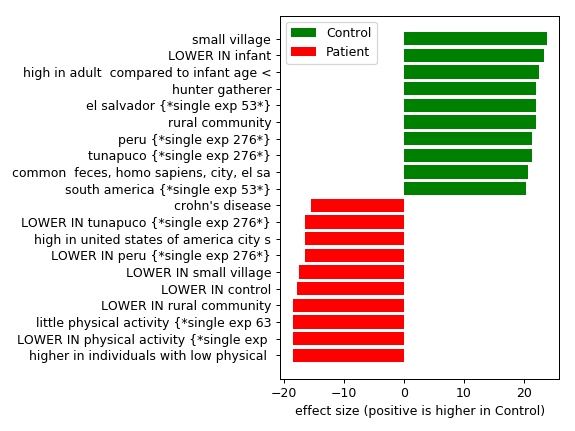

In [19]:
ax, enriched=dd.plot_diff_abundance_enrichment(term_type='combined')

In [20]:
enriched.feature_metadata

odif     pvals  \
higher in individuals with low physical activit... -18.562500  0.000999   
LOWER IN physical activity {*single exp 63*}       -18.562500  0.000999   
little physical activity {*single exp 63*}         -18.562500  0.000999   
LOWER IN rural community                           -18.518092  0.000999   
LOWER IN control                                   -17.807566  0.000999   
LOWER IN small village                             -17.452303  0.000999   
LOWER IN peru {*single exp 276*}                   -16.430921  0.000999   
 high in united states of america city state of... -16.430921  0.000999   
LOWER IN tunapuco {*single exp 276*}               -16.430921  0.000999   
crohn's disease                                    -15.587171  0.000999   
high in children with Crohn's disease compared ... -15.187500  0.000999   
 high in chronic fatigue syndrome  compared to ... -15.187500  0.000999   
 high in female  compared to male  in feces hom... -15.187500  0.000999   
chronic fatigue syndrome {*single exp 12*}         -15.187500  0.000999   
LOWER IN adult                                     -14.254934  0.001998   
mus musculus                                       -13.588816  0.000999   
age > 1 year                                       -12.478618  0.000999   
kingdom of denmark {*single exp 273*}              -12.434211  0.001998   
mouse                                              -11.945724  0.000999   
state of oklahoma                                  -11.501645  0.007992   
LOWER IN plant diet {*single exp 74*}              -11.368421  0.001998   
age 1 year                                         -11.368421  0.000999   
Higher in animal product diet compared to plant... -11.368421  0.001998   
stroke {*single exp 333*}                          -11.235197  0.001998   
age one year {*single exp 273*}                    -11.190789  0.004995   
research facility                                  -10.968750  0.011988   
infant                                             -10.657895  0.014985   
LOWER IN male                                      -10.347039  0.001998   
LOWER IN age 30-40 {*single exp 330*}              -10.125000  0.000999   
common  feces, homo sapiens, infant, kingdom of... -10.125000  0.000999   
...                                                       ...       ...   
 high in male  compared to female  in feces hom...  15.631579  0.000999   
pig                                                 15.942434  0.001998   
sus scrofa                                          15.942434  0.001998   
left colon {*single exp 256*}                       16.164474  0.000999   
right colon {*single exp 256*}                      16.164474  0.000999   
lower in babies from finland compared to estoni...  16.342105  0.000999   
LOWER IN city                                       16.342105  0.000999   
sewage {*single exp 53*}                            17.230263  0.000999   
LOWER IN effluent                                   17.230263  0.000999   
influent {*single exp 53*}                          17.230263  0.000999   
lower in wastewater plant effluent compared to ...  17.230263  0.000999   
wastewater treatment plant                          17.452303  0.000999   
LOWER IN finland                                    17.629934  0.000999   
hadza {*single exp 190*}                            17.763158  0.000999   
tanzania {*single exp 190*}                         17.763158  0.000999   
egypt {*single exp 62*}                             18.118421  0.000999   
venezuela {*single exp 75*}                         19.184211  0.000999   
amerindian {*single exp 75*}                        19.184211  0.000999   
common  feces, homo sapiens, venezuela, amerind...  19.184211  0.000999   
common  feces, homo sapiens, adult, peru, small...  19.184211  0.000999   
south america {*single exp 53*}                     20.250000  0.000999   
common  feces, homo sapiens, city, el salvador,...  20.605263  0.000999   
tunapuc

### Ignoring selected experiments already in dbBact
If our experiment is already in dbBact, or if there are other experiments in dbBact we do not want to include in the enrichment analysis, we can specify them using the `ignore_exp=[expID,...]` parameter.

In our case, the cfs experiment is already added to dbBact, so let's ignore it's annotations when doing the analysis. By looking at [dbBact.org](dbBact.org) we know its experimentID is 12. Alternatively we can use `ignore_exp=True` to automatically detect the current experimentID if it exists in dbBact (using the data and mapping file md5 hash).

2018-07-26 13:13:12 INFO removed 0 terms


<IPython.core.display.Javascript object>


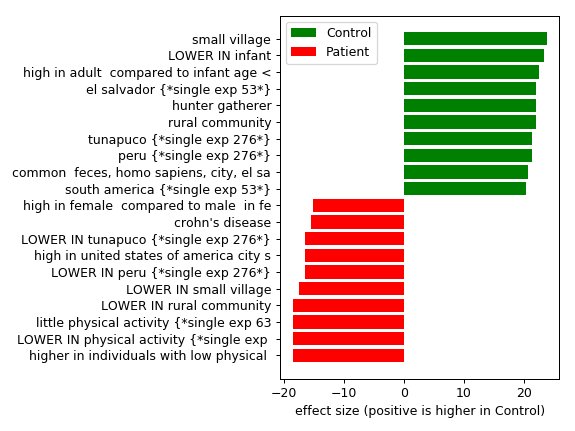

In [21]:
ax, enriched=dd.plot_diff_abundance_enrichment(term_type='combined', ignore_exp=[12])

## Adding common dbBact terms to features (`add_terms_to_features`)
We can attach to each bacteria the most common dbBact term associated with it.

The terms are selected from all of the dbBact terms, or can be selected from a supplied list.

In [22]:
cfs=cfs.add_terms_to_features(dbname='dbbact',use_term_list=['feces','saliva','skin','mus musculus'])

2018-07-26 13:13:20 INFO Getting dbBact annotations for 1100 sequences, please wait...
2018-07-26 13:13:32 INFO Got 24053 annotations
2018-07-26 13:13:32 INFO Added annotation data to experiment. Total 2151 annotations, 1100 terms


In [23]:
tt=cfs.sort_by_metadata('common_term',axis='feature')

<IPython.core.display.Javascript object>


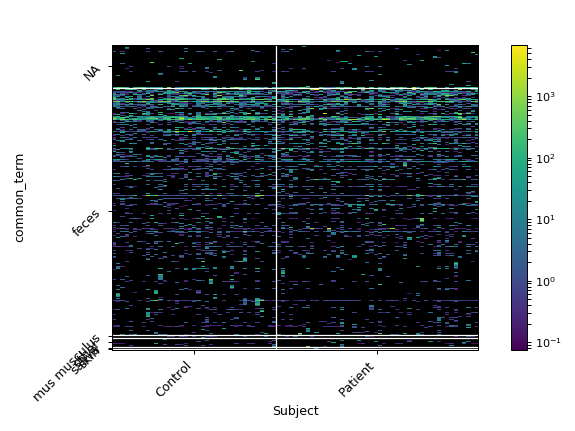

In [24]:
tt.plot(sample_field='Subject', feature_field='common_term', gui='jupyter')

## Get enriched terms using all bacteria

Instead of just comparing the bacteria enriched in the two groups (and then comparing terms between them), we can do a weighted term average for each group using all bacteria (weighing the terms of each bacteria by its' frequency in the sample). This can work if we don't have a strong set of bacteria separating between the two groups.

In [25]:
dbbact=ca.database._get_database_class('dbbact')

In [32]:
enriched=dbbact.sample_enrichment(cfs,'Subject','Control','Patient',
                                  term_type='combined',ignore_exp=[12])

2018-07-26 13:17:22 INFO 87 samples with both values
2018-07-26 13:17:22 WARNING Do you forget to normalize your data? It is required before running this function
2018-07-26 13:17:22 INFO After filtering, 2704 remaining
2018-07-26 13:17:22 INFO 39 samples with value 1 (['Control'])
2018-07-26 13:17:24 INFO method meandiff. number of higher in ['Control'] : 455. number of higher in ['Patient'] : 51. total 506


In [27]:
enriched.feature_metadata

term  \
enzyme supplement                                                                   enzyme supplement   
-no enzyme supplement                                                           -no enzyme supplement   
high in EPI dogs with enzyme supplement compare...  high in EPI dogs with enzyme supplement compar...   
-gastric bypass                                                                       -gastric bypass   
lower in people with Roux-en-Y gastric bypass c...  lower in people with Roux-en-Y gastric bypass ...   
-physical activity                                                                 -physical activity   
higher in individuals with low physical activit...  higher in individuals with low physical activi...   
little physical activity                                                     little physical activity   
high in children with Crohn's disease compared ...  high in children with Crohn's disease compared...   
-age 30-40                                                                                 -age 30-40   
 high in infant age 1 year  compared to adult a...   high in infant age 1 year  compared to adult ...   
salmune vaccination                                                               salmune vaccination   
-salmune vaccination                                                             -salmune vaccination   
-vaccination                                                                             -vaccination   
higher in non-vaccinated chickens ( high in con...  higher in non-vaccinated chickens ( high in co...   
pulsed antibiotic treatment, macrolide tylosin ...  pulsed antibiotic treatment, macrolide tylosin...   
exocrine pancreatic insufficiency                                   exocrine pancreatic insufficiency   
highfreq  feces, acinonyx jubatus, namibia,               highfreq  feces, acinonyx jubatus, namibia,   
common  united states of america, caecum, gallu...  common  united states of america, caecum, gall...   
higher in stroke patients compared to healthy c...  higher in stroke patients compared to healthy ...   
high in old (14-28 days) compared to young (0-3...  high in old (14-28 days) compared to young (0-...   
 high in control  compared to diarrhea  in fece...   high in control  compared to diarrhea  in fec...   
higher in babies from finland compared to eston...  higher in babies from finland compared to esto...   
canis mesomelas                                                                       canis mesomelas   
smj: higher in female mice feces treated with a...  smj: higher in female mice feces treated with ...   
common  feces, namibia, canis mesomelas,                     common  feces, namibia, canis mesomelas,   
acinonyx jubatus                                                                     acinonyx jubatus   
-dust day                                                                                   -dust day   
higher in dust storm compared to clear day in i...  higher in dust storm compared to clear day in ...   
namibia                                                                                       namibia   
...                                                                                               ...   
peru                                                                                             peru   
tunapuco                                                                                     tunapuco   
-tibetan pig                                                                             -tibetan pig   
-tibetan swine                                                                         -tibetan swine   
 high in sus scrofa pig  compared to tibetan pi...   high in sus scrofa pig  compared to tibetan p...   
 high in male  compared to female  in feces hom...   high in male  compared to female  in feces ho...   
lower in lean participants in human feces ( hig...  lower in lean participants in human feces ( hi...   
lo